In [35]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [36]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
clf = KNeighborsClassifier(n_neighbors=3)

In [37]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [51]:
print("테스트 세트 예측 :", clf.predict(X_test))
print("테스트 세트 정확도 :", clf.score(X_test, y_test))

print("훈련 세트 정홛도 :", accuracy_score(y_train, clf.predict(X_train)))
plt.rc("font", family = "AppleGothic")

테스트 세트 예측 : [1 0 1 0 1 0 0]
테스트 세트 정확도 : 0.8571428571428571
훈련 세트 정홛도 : 0.9473684210526315


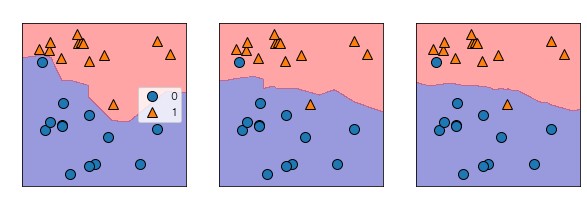

In [54]:
fig, axes = plt.subplots(1,3, figsize = (10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1],y,ax = ax)
    ax.set_title("%d 이웃" % (n_neighbors), c = "w")
    ax.set_xlabel("특성0", c = "w")
    ax.set_ylabel("특성 1", c = "w")
axes[0].legend(loc = "best")

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


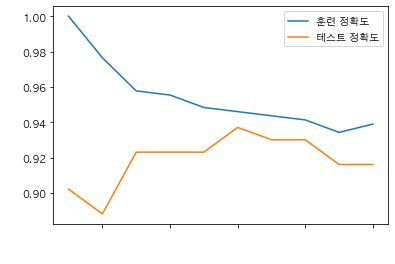

In [57]:
# 모델의 복잡도와 일바화 사이의 관계 입증
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = "훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label = "테스트 정확도")
plt.xticks(c = "W")
plt.ylabel("정확도", c = "w")
plt.xlabel("n_neighbors", c = "w")
plt.legend(loc = "best")

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


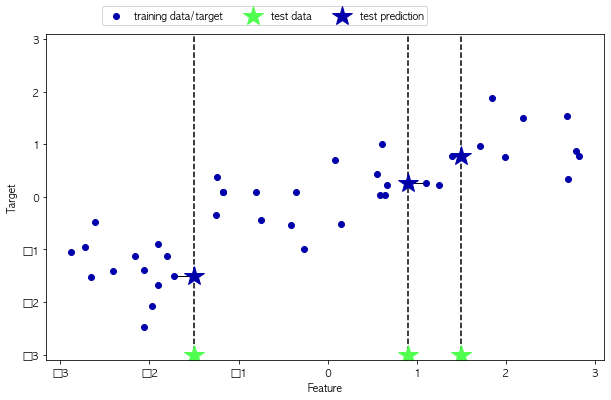

In [58]:
mglearn.plots.plot_knn_regression(n_neighbors= 1)

In [60]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [62]:
print("테스트 세트예측", reg.predict(X_test))

테스트 세트예측 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [ ]:
# KNN의 장점 : 매우 이해하기 쉬운 모델, 많이 조정하지 않아도 자주 종흔 성능 발휘
# KNN의 단점 : 예측이 느리고 많은 특성을 처리하는 능력이 부족